In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pickle

In [7]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../datasets/train_set.csv')

# Drop any columns that are not relevant for classification
df = df.drop(columns=["Assembly Code", "Assembly Description", "Type Name"])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and labels
X = df.drop(columns=['Category'])
y = df['Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(df['Category'].unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/100
74/74 [==============================] - 1s 4ms/step - loss: 42.4708 - accuracy: 0.4295 - val_loss: 4.3300 - val_accuracy: 0.5900
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 4.1883 - accuracy: 0.6016 - val_loss: 3.9815 - val_accuracy: 0.4368
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 2.4998 - accuracy: 0.6046 - val_loss: 1.7472 - val_accuracy: 0.5900
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 1.6222 - accuracy: 0.6507 - val_loss: 1.3610 - val_accuracy: 0.6858
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 1.4632 - accuracy: 0.6648 - val_loss: 1.2840 - val_accuracy: 0.6743
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 1.4890 - accuracy: 0.6699 - val_loss: 1.4554 - val_accuracy: 0.6897
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 1.3914 - accuracy: 0.6746 - val_loss: 1.4010 - val_accuracy: 0.6628
Epoch 8/100


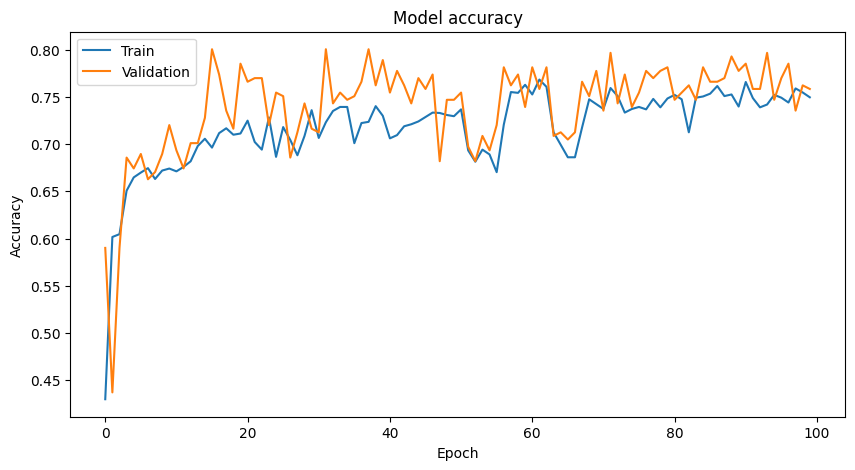

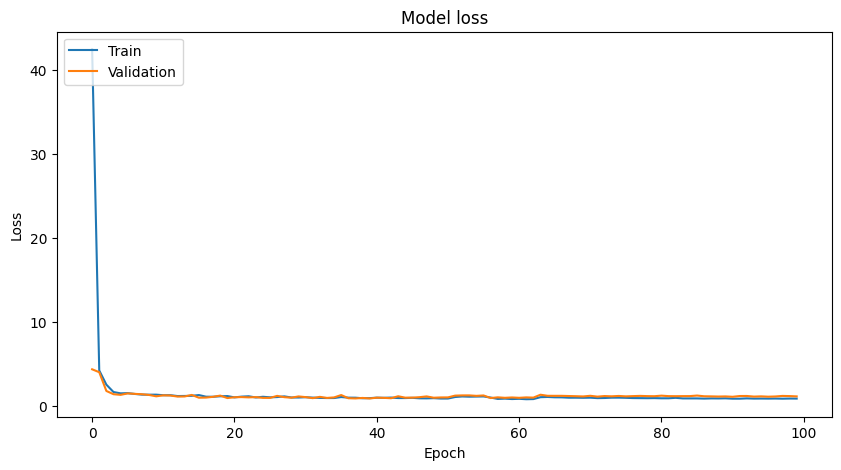

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
# Save the model to disk
model.save('FNN_model.h5')
print("Model saved to disk.")

# Save the label_encoder to a file
with open('label_encoder_ipynb.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

Model saved to disk.
